<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Recomendando Música

El objetivo de este caso-taller es construir un sistema de recomendación de Música utilizando los datos de [Last.fm](https://www.last.fm/) provistos  abiertamente por [grouplens](https://grouplens.org/about/what-is-grouplens/) para: **"avanzar la teoría y la práctica de la computación social mediante la construcción y la comprensión de sistemas *(de recomendación)* utilizados por personas reales".**

Los datos contienen información sobre artistas, usuarios, y las veces que estos escucharon sus canciones. Las bases se encuentran en los `Archivos de Laboratorio` en la carpeta `data`, allí también está disponible un archivo [README](data/readme.txt) que contiene más información sobre las bases.


## Instrucciones generales

1. Para desarrollar el *cuaderno*, primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el  tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos

En la carpeta `data` se encuentran los archivos:

   - `artists.dat`  que contienen el identificador del artista (`id`), nombre (`name`), link a la página del artista en last.fm (`url`), y link a la imagen del usuario (`pictureURL`), vale aclarar que varios de estos links están rotos.
   - `user_artists.dat`  que contiene identificador del usuario (`userID`), nombre del artista que escuchó (`artistID`), y las veces que los escuchó (`weight`).

Cargue estos datos en su *cuaderno*:

   1. Para la base de artistas seleccione las columnas de identificador de artista (`id`) y nombre (`name`). Renombre estas columnas para poder hacer la unión con la base `user_artists.dat`.
   2. Para la base de usuarios y artistas, renombre las columnas de forma tal que se mantenga la consistencia para unir con la base anterior, y renombre la columna `weight` a `nro_reproducciones`.
   3. Una estas bases.
   

In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=750f34a524ceba8c8ff4c8dd74f908cd4318d993486ae9d4e8c7c28ca57b90d0
  Stored in directory: /root/.cache/pip/wheels/7f/49/e3/42c73b19a264de37129fadaa0c52f26cf50e87de08fb9804af
Successfully built apyori


In [ ]:
# Utilice este espacio para escribir el código.
import pandas as pd
from google.colab import files

# Subir archivos manualmente
uploaded = files.upload()

# Verifica nombres
print(uploaded.keys())

# Cargar la base de artistas
ruta_artistas = 'artists.dat'
artistas = pd.read_csv(ruta_artistas, sep='\t', header=0, names=['id', 'name', 'url', 'pictureURL'])

# Cargar la base de usuarios y artistas escuchados
ruta_user_artists = 'user_artists.dat'
user_artists = pd.read_csv(ruta_user_artists, sep='\t')

# Renombrar columnas para hacer la unión
artistas = artistas[['id', 'name']]
user_artists = user_artists.rename(columns={'weight': 'nro_reproducciones'})

# Mostrar las primeras filas de ambas bases
print("Artistas:")
print(artistas.head())

print("\nUser Artists:")
print(user_artists.head())

# Asegurarse de que las columnas 'artistID' e 'id' tengan el mismo tipo de datos
user_artists['artistID'] = user_artists['artistID'].astype(str)
artistas['id'] = artistas['id'].astype(str)

# Unir las dos bases de datos por el id del artista (artistID en la base de usuarios)
base_unida = pd.merge(user_artists, artistas, left_on='artistID', right_on='id')

# Mostrar las primeras filas de la base unida
print(base_unida.head())


Saving artists.dat to artists.dat
Saving user_artists.dat to user_artists.dat
dict_keys(['artists.dat', 'user_artists.dat'])
Artistas:
   id               name
0   1       MALICE MIZER
1   2    Diary of Dreams
2   3  Carpathian Forest
3   4       Moi dix Mois
4   5        Bella Morte

User Artists:
   userID  artistID  nro_reproducciones
0       2        51               13883
1       2        52               11690
2       2        53               11351
3       2        54               10300
4       2        55                8983
   userID artistID  nro_reproducciones  id           name
0       2       51               13883  51    Duran Duran
1       2       52               11690  52      Morcheeba
2       2       53               11351  53            Air
3       2       54               10300  54   Hooverphonic
4       2       55                8983  55  Kylie Minogue


##### Procedimiento.
Primeramente se utilizaron las librerias de pandas y google.colab import files, estos se usaron para realizar la importación de archivos al cuaderno de python y para realizar el procesamiento de los datos. Posterior a cargar cada una de las bases de datos que son las de artistas y usuarios artistas, se hizo la unión de esta en una sola base datos, con el fin de tener una gran base datos que complementen toda la información disponible, esta unión se realizó por el id de la base artistas y de la base usarios se uso el artistID, pero antes se habia revisado que estos tipo identificadores tengan el mismo tipo de datos para que la unión sea correcta.

##### Análisis
Se observa incialmente que la artira Duran Duran es el artista mas escuchado dentro nuestra base de datos por el usuario numero 2. Asimismo se observa que el usuario #2 dispone de mucho tiempo para reproducir un alto numero de reproduciones de musica, Adicionalmente, se observa que tiene gustos musicales muy variados, pero destaca el trip hop, rock y pop.

### 2. Análisis preliminar.

En esta sección exploraremos la base. Para ello responda las siguientes preguntas.

#### 2.1 ¿Cuantos usuarios y artistas hay en la base?


In [ ]:
#  número de usuarios únicos
n_usuarios = base_unida['userID'].nunique()

#  número de artistas únicos
n_artistas = base_unida['artistID'].nunique()

print(f"Usuarios únicos: {n_usuarios}")
print(f"Artistas únicos: {n_artistas}")

Usuarios únicos: 1892
Artistas únicos: 17632


Existe aproximadamente 9.32 artistas por cada usuario, al sugerir que en promedio, cada usuario tiene una gran variedad de artistas entre los cuales elegir y reproducir su música.


#### 2.2 ¿Cuáles es la distribución de probabilidad del consumo por artista? (haga el calculo sin ponderar y ponderando por el numero de reproducciones) ¿Qué podemos inferir a partir de la comparación de ambas?

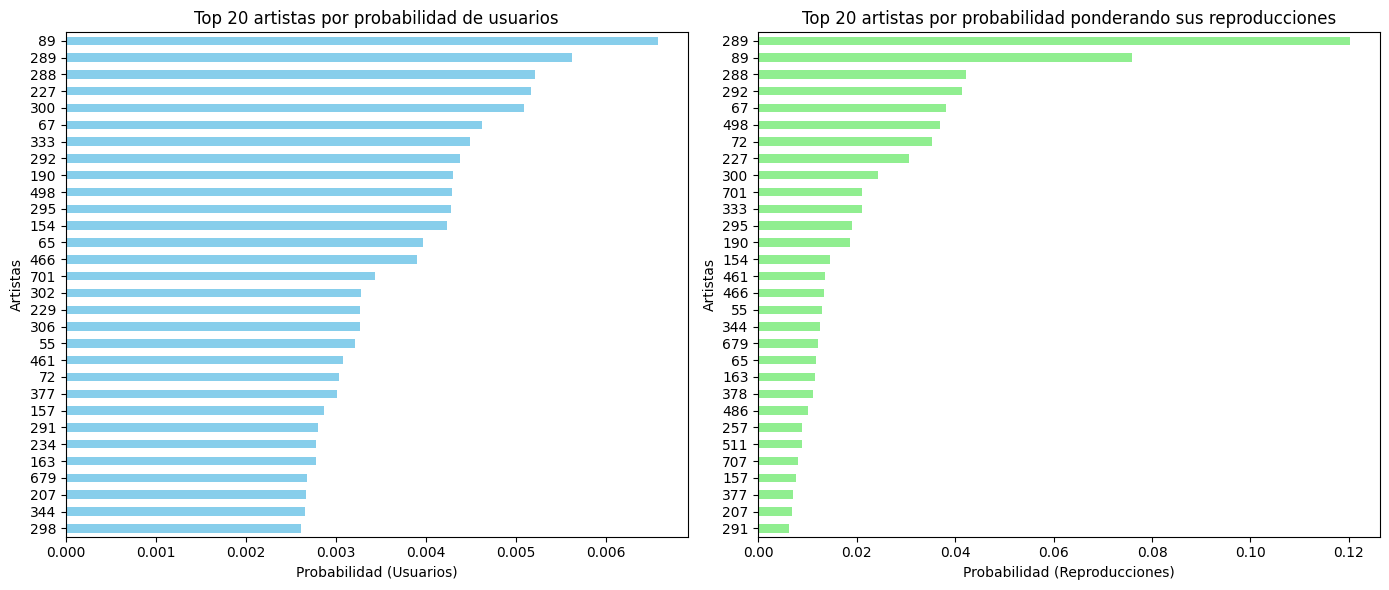

In [ ]:
import matplotlib.pyplot as plt

# Distribución sin ponderar: proporción de usuarios por artista
consumo_sin_ponderar = base_unida['artistID'].value_counts(normalize=True)  # ya normaliza = probabilidad

# Distribución ponderada: proporción de reproducciones por artista
#consumo_ponderado = base_unida.groupby('artistID')['nro_reproducciones'].sum()
#consumo_ponderado = consumo_ponderado / consumo_ponderado.sum()  # normalizamos = probabilidad

rep_por_art=base_unida.groupby('artistID')['nro_reproducciones'].sum() #total de reproducciones por artista
pesos=rep_por_art/rep_por_art.sum() #peso de cada artista en base a su cantidad de reproducciones
usuarios_pond=base_unida['artistID'].value_counts()*pesos # multiplicamos pesos de reproducciones por la cantidad de usuarios
consumo_ponderado=usuarios_pond/usuarios_pond.sum() # calculamos la probabilidad ponderada por reproducciones

# Tomar solo el top 20 artistas
top_usuarios = consumo_sin_ponderar.head(30)
top_reproducciones = consumo_ponderado.sort_values(ascending=False).head(30)

# Graficar distribuciones
plt.figure(figsize=(14, 6))

# Gráfico 1: Distribución de probabilidad sin ponderar
plt.subplot(1, 2, 1)
top_usuarios.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 20 artistas por probabilidad de usuarios')
plt.xlabel('Probabilidad (Usuarios)')
plt.ylabel('Artistas')

# Gráfico 2: Distribución de probabilidad ponderada
plt.subplot(1, 2, 2)
top_reproducciones.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Top 20 artistas por probabilidad ponderando sus reproducciones')
plt.xlabel('Probabilidad (Reproducciones)')
plt.ylabel('Artistas')

plt.tight_layout()
plt.show()

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 2.3 Para el usuario 8 (`userID==8`) ¿cuál es la distribución de reproducción de artistas basado en el número de reproducciones relativas?. Presente sus resultados usando tablas y/o gráficas. ¿Encuentra algún patrón en los artistas que escucha y las veces que reproduce? ¿Podemos decir algo de sus preferencias?


/tmp/ipython-input-1443878482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usuario_8['proporcion_reproducciones'] = usuario_8['nro_reproducciones'] / usuario_8['nro_reproducciones'].sum()


                     name  nro_reproducciones  proporcion_reproducciones
317             No Angels                6291                   0.173406
318                 Sandy                2396                   0.066044
307        Britney Spears                2258                   0.062240
319        Vanessa Petruo                1735                   0.047824
310               Beyoncé                1425                   0.039279
320             Alexander                1407                   0.038783
311             Sugababes                1039                   0.028639
321           Queensberry                 963                   0.026544
301             Lady Gaga                 921                   0.025387
322          Fady Maalouf                 819                   0.022575
323                  Cher                 800                   0.022051
324  Barbara Schöneberger                 794                   0.021886
309    Christina Aguilera                 783      

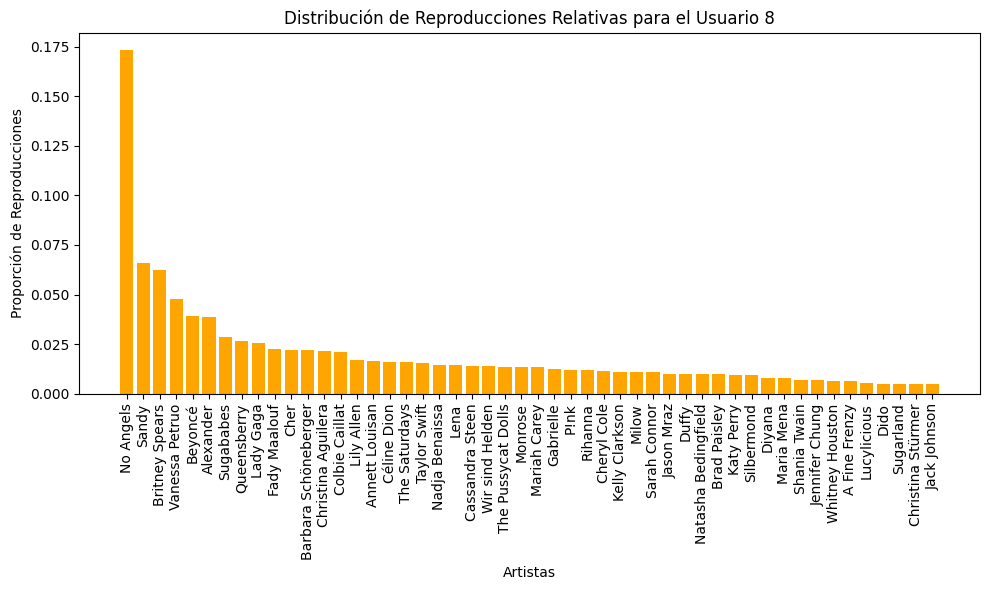

In [ ]:
# Utilice este espacio para escribir el código.
# Filtrar los datos del usuario con userID = 8
usuario_8 = base_unida[base_unida['userID'] == 8]

# Calcular la proporción de reproducciones para cada artista escuchado por el usuario 8
usuario_8['proporcion_reproducciones'] = usuario_8['nro_reproducciones'] / usuario_8['nro_reproducciones'].sum()

# Ordenar los artistas por la proporción de reproducciones (mayor a menor)
usuario_8 = usuario_8.sort_values(by='proporcion_reproducciones', ascending=False)


print(usuario_8[['name', 'nro_reproducciones', 'proporcion_reproducciones']])

# Graficar la distribución
plt.figure(figsize=(10, 6))
plt.bar(usuario_8['name'], usuario_8['proporcion_reproducciones'], color='orange')
plt.title('Distribución de Reproducciones Relativas para el Usuario 8')
plt.ylabel('Proporción de Reproducciones')
plt.xlabel('Artistas')
plt.xticks(rotation=90)  # Rotar los nombres de los artistas para que sean más legibles
plt.tight_layout()
plt.show()

##### Procedimiento
Primeramente, se realizó un filtro de la base de datos del usuario id igual a 8, posterior se realizo un calculo para extraer la proporción de las reproducciones para cada artista escuchado por el usuario 8. Despues, se ordena los artistas por la proporción de reproducciones de mayor a menor. Al tener todo lo anterior se realiza el grafico de distrubución.

##### Análisis
Los primeros 5 artistas ("No Angels", "Sandy", "Britney Spears", "Vanessa Petruo" y "Beyonce") concentran una proporción significativa de las reproducciones. Al sugerir, que el usuario tiene preferencias bastante marcadas y tiende a escuchar repetidamente a sus artistas favoritos.

Aunque hay una concentración en las reproducciones, el usuario #8 tiende a escuchar a varios artistas en una menor frecuencia. Es decir, hay otros artistas pero no los escucha frecuentemente.

No Angeles es el artista mas reproducido por este usuario, con aproximadamente el 17% de sus reproduciones totales. Esto dice que este su artista favorito y esta presente en casi todos los dias de su vida.

##### Conclusión
El usuario #8 reproduce mucho musica de genero de pop femenino y los girl groups, con presencia notable de actos alemanes/europeos, Asimismo, combina estos  con estrellas globales del pop. Sin embargo, No Angels concentra aproximadamente ≈17% de todas las reproducciones, casi el triple del siguiente artista. Además, el hecho de que Sandy y Vanessa Petruo —integrantes del mismo universo No Angels— aparezcan en el top 5 sugiere fidelidad fuerte a esos artista a pesar de los cambios. Al sumar alrededor el 29% del total.

### 3. Generando Recomendaciones

En esta sección nos interesa generar recomendaciones ***nuevas y relevantes*** para el usuario 8 (`userID==8`). Para ello vamos a generar distintos sistemas de recomendación y comparar las recomendaciones generadas.

#### 3.1. Filtrado colaborativo sencillo: promedios simples.

Usando el promedio simple basado en el número de usuarios que escucha un artista (sin considerar el número de veces que estos usuarios reproducen al artista) genere una tabla y/o gráfica con 10 recomendaciones de artistas para este usuario. Explique con cuidado su procedimiento y justifique sus elecciones.

In [ ]:
base_unida

,userID,artistID,nro_reproducciones,id,name
0,2,51,13883,51,Duran Duran
1,2,52,11690,52,Morcheeba
2,2,53,11351,53,Air
3,2,54,10300,54,Hooverphonic
4,2,55,8983,55,Kylie Minogue
...,...,...,...,...,...
92829,2100,18726,337,18726,Nyktalgia
92830,2100,18727,297,18727,Atsakau niekadA
92831,2100,18728,281,18728,Domantas Razauskas
92832,2100,18729,280,18729,Atalyja


In [ ]:
#Tenemos que calcular #usuarios que han escuchado cada artista
popularidad_simple = base_unida.groupby('artistID')['userID'].nunique().reset_index()
popularidad_simple.columns = ['artistID', 'n_usuarios']

#Tenemos que btener la lista de artistas que el usuario 8 ya escuchó
artistas_escuchados_u8 = base_unida[base_unida['userID'] == 8]['artistID'].unique()

#Tenemos que filtrar los artistas que el usuario 8 NO ha escuchado
no_escuchados = popularidad_simple[~popularidad_simple['artistID'].isin(artistas_escuchados_u8)]

#Tenemos que ordenar por #usuarios que los han escuchado y mostrarle el top 10 de recomendaciones para el
recomendaciones = no_escuchados.sort_values(by='n_usuarios', ascending=False).head(10)
nombres_artistas = base_unida[['artistID', 'name']].drop_duplicates(subset='artistID')

# Unimos nombre a las recomendaciones
recomendaciones = recomendaciones.merge(nombres_artistas, on='artistID', how='left')

print("Recomendaciones para el usuario 8 basadas en popularidad simple:")
print(recomendaciones)


Recomendaciones para el usuario 8 basadas en popularidad simple:
  artistID  n_usuarios           name
0      227         480    The Beatles
1       67         429        Madonna
2      333         417  Avril Lavigne
3      190         400           Muse
4      498         399       Paramore
5      154         393      Radiohead
6       65         369       Coldplay
7      466         362          Ke$ha
8      701         319        Shakira
9      229         304    The Killers


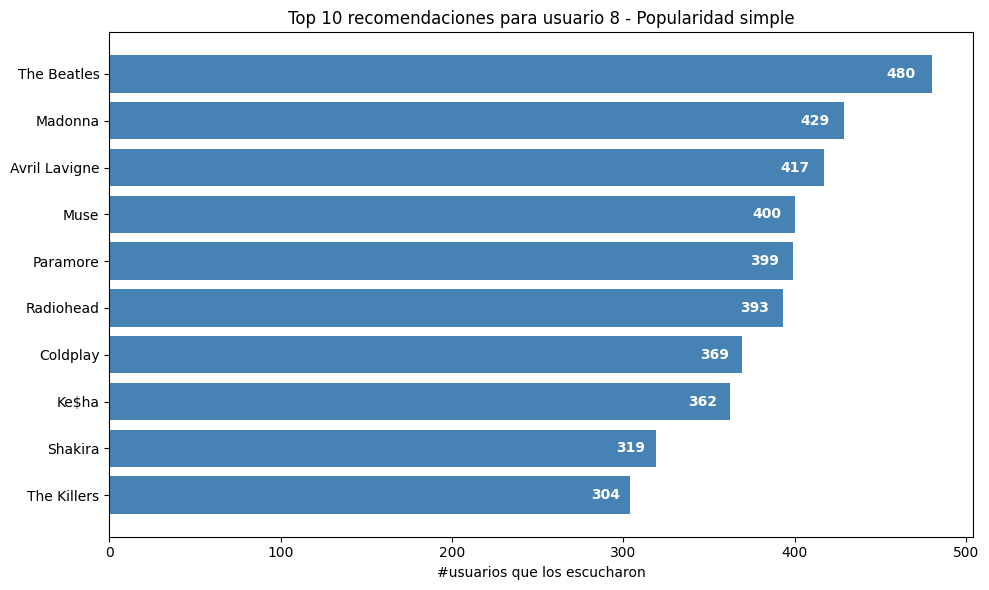

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.barh(recomendaciones['name'][::-1], recomendaciones['n_usuarios'][::-1], color='steelblue')
plt.xlabel('#usuarios que los escucharon')
plt.title('Top 10 recomendaciones para usuario 8 - Popularidad simple')

for bar in bars:
    width = bar.get_width()
    label_text = f'{int(width):,}'
    plt.text(width * 0.98,
             bar.get_y() + bar.get_height() / 2,
             label_text,
             va='center',
             ha='right',
             color='white',
             fontweight='bold')

plt.tight_layout()
plt.show()

#### Procedimiento
Para hacerle recomendaciones al usuario 8, usamos un método simple: miramos cuáles son los artistas más populares, es decir, los que más usuarios han escuchado. Luego quitamos los que él ya escuchó y le recomendamos los 10 más populares que aún no conoce

#### Analisis
Este método es útil porque le sugiere artistas que mucha gente escucha, así que es probable que le gusten. Pero no es muy personalizado, ya que no toma en cuenta sus gustos específicos ni cuántas veces escucha a cada artista. Aun así, es una buena forma de empezar a recomendarle cosas nuevas

#### 3.2.  Filtrado colaborativo sencillo: promedios ponderados.

Utilice un promedio ponderado para generar las recomendaciones. Considere el número de veces que los usuarios reproducen al artista. En otras palabras, genere un ponderador que use el número de veces que el artista fue reproducido (`nro_reproducciones`). Este método pondera la popularidad de un artista, combinando el número de usuarios que lo escuchan con la frecuencia de reproducción, de manera que los artistas con más reproducciones reciban una mayor ponderación.

Genere una tabla y/o gráfica con las 10 principales recomendaciones de artistas para este usuario. Explique detalladamente su procedimiento y justifique sus elecciones. Compare estas recomendaciones con las del sistema implementado en el paso anterior.

In [ ]:
#Tenemos que calcular para cada artista: total de usuarios únicos y total de reproducciones
popularidad_ponderada = base_unida.groupby('artistID').agg({
    'userID': 'nunique',
    'nro_reproducciones': 'sum'
}).reset_index()
popularidad_ponderada.columns = ['artistID', 'n_usuarios', 'total_reproducciones']

#Tenemos que crear un puntaje ponderado: puedes usar simplemente el producto
popularidad_ponderada['puntaje'] = popularidad_ponderada['n_usuarios'] * popularidad_ponderada['total_reproducciones']

#Tenemos que obtener los artistas que el usuario 8 ya escuchó
artistas_escuchados_u8 = base_unida[base_unida['userID'] == 8]['artistID'].unique()

#Tenemos que filtrar los artistas que el usuario 8 NO ha escuchado
no_escuchados = popularidad_ponderada[~popularidad_ponderada['artistID'].isin(artistas_escuchados_u8)]

#Tenemos que ordenar por el puntaje ponderado y sacar el top 10
recomendaciones_ponderadas = no_escuchados.sort_values(by='puntaje', ascending=False).head(10)

#Tenemos que agregar los nombres desde base_unida
nombres_artistas = base_unida[['artistID', 'name']].drop_duplicates(subset='artistID')
recomendaciones_ponderadas = recomendaciones_ponderadas.merge(nombres_artistas, on='artistID', how='left')

#Orden final de columnas
recomendaciones_ponderadas = recomendaciones_ponderadas[['artistID', 'name', 'n_usuarios', 'total_reproducciones', 'puntaje']]
print("Recomendaciones ponderadas para el usuario 8 - popularidad con reproducciones")
print(recomendaciones_ponderadas)


Recomendaciones ponderadas para el usuario 8 - popularidad con reproducciones
  artistID           name  n_usuarios  total_reproducciones    puntaje
0       67        Madonna         429                921198  395193942
1      498       Paramore         399                963449  384416151
2       72   Depeche Mode         282               1301308  366968856
3      227    The Beatles         480                662116  317815680
4      701        Shakira         319                688529  219640751
5      333  Avril Lavigne         417                525844  219276948
6      190           Muse         400                485076  194030400
7      154      Radiohead         393                385306  151425258
8      461    Miley Cyrus         286                489065  139872590
9      466          Ke$ha         362                384405  139154610


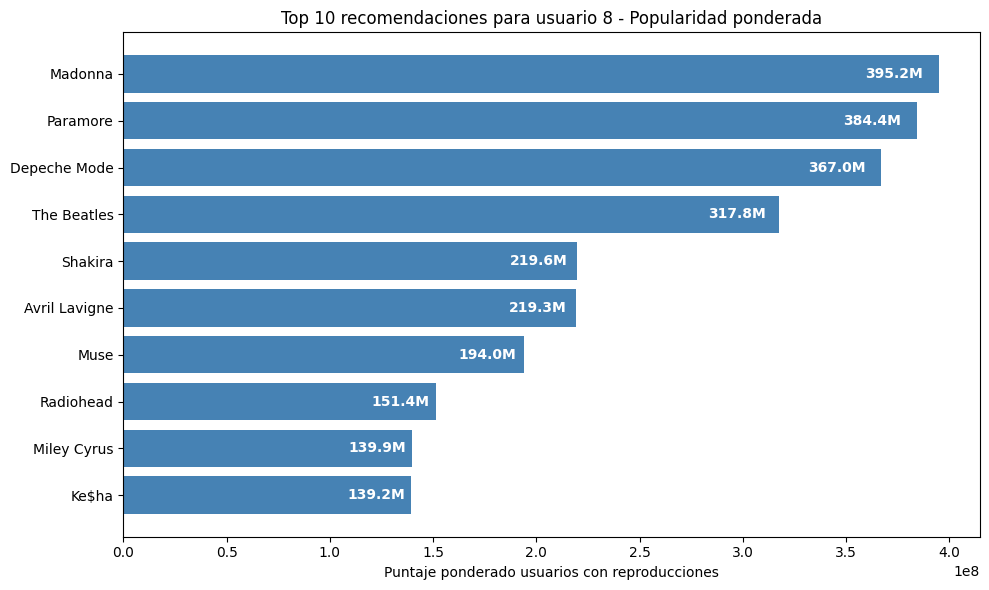

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.barh(recomendaciones_ponderadas['name'][::-1], recomendaciones_ponderadas['puntaje'][::-1], color='steelblue')
plt.xlabel('Puntaje ponderado usuarios con reproducciones')
plt.title('Top 10 recomendaciones para usuario 8 - Popularidad ponderada')

for bar in bars:
    width = bar.get_width()
    label_text = f'{width/1_000_000:.1f}M'
    plt.text(width * 0.98,
             bar.get_y() + bar.get_height() / 2,
             label_text,
             va='center',
             ha='right',
             color='white',
             fontweight='bold')
plt.tight_layout()
plt.show()

#### Procedimiento
Para hacer estas recomendaciones, combinamos dos cosas: cuántos usuarios han escuchado a cada artista y cuántas veces lo hicieron. Multiplicamos estos valores para obtener un puntaje que refleja tanto la popularidad como la intensidad de escucha. Luego quitamos los artistas que el usuario 8 ya conoce y nos quedamos con los 10 mejores puntajes

#### Analisis
Este método no solo sugiere artistas que son conocidos por mucha gente, sino también aquellos que se escuchan mucho. Así se destacan artistas como Madonna o Paramore, que no solo tienen muchos oyentes, sino que además son reproducidos con frecuencia, lo que indica que gustan bastante

#### Conclusiones
Esta forma de recomendar es más precisa que solo contar usuarios, ya que también mide qué tan escuchado es un artista. Por eso, las sugerencias finales tienden a ser más relevantes y ajustadas a los gustos generales de la comunidad


#### 3.3.  Filtrado colaborativo sencillo: similitud de coseno.

Usando el promedio ponderado de reproducciones genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario. Para generar los pesos utilice la distancia de coseno. Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en el paso anterior.

In [ ]:
base_unida

,userID,artistID,nro_reproducciones,id,name
0,2,51,13883,51,Duran Duran
1,2,52,11690,52,Morcheeba
2,2,53,11351,53,Air
3,2,54,10300,54,Hooverphonic
4,2,55,8983,55,Kylie Minogue
...,...,...,...,...,...
92829,2100,18726,337,18726,Nyktalgia
92830,2100,18727,297,18727,Atsakau niekadA
92831,2100,18728,281,18728,Domantas Razauskas
92832,2100,18729,280,18729,Atalyja


In [ ]:

matriz_reprod=base_unida.pivot_table(values='nro_reproducciones',index='userID',columns='artistID')
matriz_reprod


artistID,1,10,100,1000,10000,10001,10002,10003,10004,10005,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,1315.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

matriz_reprod_dummy=matriz_reprod.copy().fillna(0)

cosine_sim = cosine_similarity(matriz_reprod_dummy, matriz_reprod_dummy)

cosine_sim = pd.DataFrame(cosine_sim, index=matriz_reprod_dummy.index, columns=matriz_reprod_dummy.index)

cosine_sim.head(10)

userID,2,3,4,5,6,7,8,9,10,11,...,2090,2091,2092,2093,2094,2095,2096,2097,2099,2100
userID,,,,,,,,,,,,,,,,,,,,,
2,1.000000,0.0,0.144786,0.028692,0.007016,0.030219,0.008964,0.0,0.000000,0.021267,...,0.000000,0.043405,0.000000,0.004625,0.001585,0.0,0.000956,0.082134,0.000000,0.0
3,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000318,0.0
4,0.144786,0.0,1.000000,0.081193,0.006609,0.000000,0.000000,0.0,0.009072,0.013407,...,0.000000,0.000000,0.003776,0.006178,0.000000,0.0,0.045125,0.659085,0.000000,0.0
5,0.028692,0.0,0.081193,1.000000,0.000000,0.000000,0.000000,0.0,0.169078,0.004639,...,0.010993,0.000000,0.205141,0.000000,0.000000,0.0,0.204557,0.119133,0.000000,0.0
6,0.007016,0.0,0.006609,0.000000,1.000000,0.012713,0.018881,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
7,0.030219,0.0,0.000000,0.000000,0.012713,1.000000,0.167416,0.0,0.000000,0.247062,...,0.000000,0.001678,0.000000,0.000000,0.017636,0.0,0.000000,0.000000,0.000000,0.0
8,0.008964,0.0,0.000000,0.000000,0.018881,0.167416,1.000000,0.0,0.000000,0.187304,...,0.000000,0.000000,0.000000,0.000000,0.034826,0.0,0.000000,0.000000,0.000000,0.0
9,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,...,0.048289,0.000000,0.000000,0.000000,0.022935,0.0,0.000000,0.000000,0.005969,0.0
10,0.000000,0.0,0.009072,0.169078,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,...,0.008895,0.000000,0.109260,0.000000,0.000000,0.0,0.057869,0.110738,0.000000,0.0


In [ ]:
import numpy as np

recomendaciones_coseno=nombres_artistas.copy()

sim_usr8=cosine_sim[8]

l=[]

for artist_id in recomendaciones_coseno['artistID']:

  reps=matriz_reprod[artist_id]
  idx = reps[reps.isnull()].index
  sim_usr8_clean = sim_usr8.drop(idx)
  reps = reps.dropna()

  if sim_usr8_clean.sum()==0:
    l.append(0)
  else:
    pond_cos=np.dot(sim_usr8_clean, reps)/ sim_usr8_clean.sum()
    l.append(pond_cos)
  if artist_id=='8308':
    print(sim_usr8_clean)
    print(reps)
    print(pond_cos)

recomendaciones_coseno['Reproducciones']=l

userID
584     0.029099
1625    0.000000
Name: 8, dtype: float64
userID
584     32990.0
1625        5.0
Name: 8308, dtype: float64
32990.0


In [ ]:
recomendaciones_coseno

,artistID,name,Reproducciones
0,51,Duran Duran,1889.480625
1,52,Morcheeba,2121.128670
2,53,Air,556.798905
3,54,Hooverphonic,527.773793
4,55,Kylie Minogue,1536.414521
...,...,...,...
92829,18726,Nyktalgia,0.000000
92830,18727,Atsakau niekadA,0.000000
92831,18728,Domantas Razauskas,0.000000
92832,18729,Atalyja,0.000000


In [ ]:
#Tenemos que filtrar los artistas que el usuario 8 NO ha escuchado
no_escuchados_coseno = recomendaciones_coseno[~recomendaciones_coseno['artistID'].isin(artistas_escuchados_u8)]

#Tenemos que ordenar por el puntaje ponderado y sacar el top 10
recomendaciones_coseno_top = no_escuchados_coseno.sort_values(by='Reproducciones', ascending=False).head(10)



In [ ]:
base_unida[base_unida['name']=='Johnny Hallyday']

,userID,artistID,nro_reproducciones,id,name
26929,584,8308,32990,8308,Johnny Hallyday
72004,1625,8308,5,8308,Johnny Hallyday


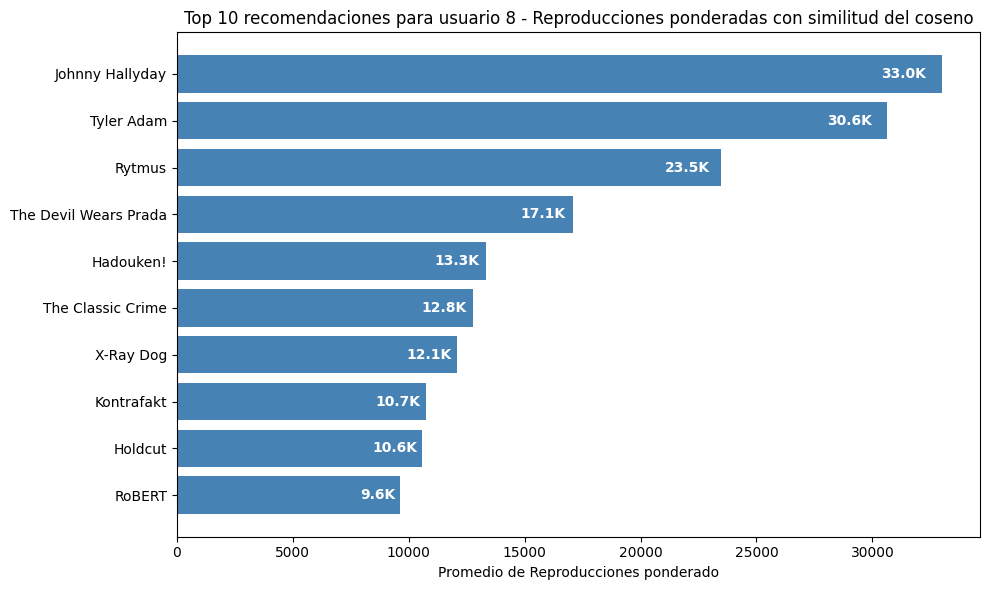

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.barh(recomendaciones_coseno_top['name'][::-1], recomendaciones_coseno_top['Reproducciones'][::-1], color='steelblue')
plt.xlabel('Promedio de Reproducciones ponderado')
plt.title('Top 10 recomendaciones para usuario 8 - Reproducciones ponderadas con similitud del coseno')

for bar in bars:
    width = bar.get_width()
    label_text = f'{width/1_000:.1f}K'
    plt.text(width * 0.98,
             bar.get_y() + bar.get_height() / 2,
             label_text,
             va='center',
             ha='right',
             color='white',
             fontweight='bold')
plt.tight_layout()
plt.show()

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.4.  Filtrado colaborativo usando SVD


Usando la descomposición en valores singulares (SVD) genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores.


In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.5.  Filtrado colaborativo usando Análisis de Canasta de Compra

Usando  el algoritmo `Apriori` genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores. Esto puede tomar mucho tiempo, sea cuidadoso al elegir los hiper-parámetors del modelo, utilice los resultados de las estadísticas descriptivas para elegir sus hiper-parámetros, y genere solo reglas con 2 elementos. (Puede también aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 4. Recomendaciones generales

De acuerdo con los resultados encontrados, en su opinión ¿qué procedimiento generó las mejores recomendaciones para este usuario? ¿Cómo implementaría una evaluación objetiva de estas recomendaciones? Justifique su respuesta.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).